In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
dtypes = {'SUMMONS_KEY': 'str', 'OFFENSE_DESCRIPTION':'str',
       'LAW_SECTION_NUMBER':'str', 'LAW_DESCRIPTION':'str', 'SUMMONS_CATEGORY_TYPE':'str',
       'AGE_GROUP':'str', 'SEX': 'str', 'RACE': 'str', 'JURISDICTION_CODE': 'str', 'BORO':'str',
       'PRECINCT_OF_OCCUR':'str', 'X_COORDINATE_CD':'float64', 'Y_COORDINATE_CD':'float64', 'Latitude': 'float64',
       'Longitude': 'float64'}
df = pd.read_csv("/Users/joanner/Documents/GradSchool/Classes/Spring 2020 - GC/WWD/workingwithdata/final project/data/NYPD_Criminal_Court_Summons__Historic_.csv", dtype=dtypes, parse_dates=['SUMMONS_DATE'], infer_datetime_format=True)
df

,SUMMONS_KEY,SUMMONS_DATE,OFFENSE_DESCRIPTION,LAW_SECTION_NUMBER,LAW_DESCRIPTION,SUMMONS_CATEGORY_TYPE,AGE_GROUP,SEX,RACE,JURISDICTION_CODE,BORO,PRECINCT_OF_OCCUR,X_COORDINATE_CD,Y_COORDINATE_CD,Latitude,Longitude
0,173135642,2017-12-31,"RIFLE, SHOTGUN, AMMO SALE OR PURCHASE",10-306,Administrative Code,AMMO,25-44,F,WHITE HISPANIC,2,BRONX,43,1021543.0,239271.0,40.823349,-73.865257
1,173138632,2017-12-31,"MARIJUANA, POSSESSION OF",221.05,Penal Law,MARIJUANA,25-44,F,BLACK,0,BRONX,44,1006350.0,243112.0,40.833942,-73.920138
2,173193579,2017-12-31,KEY IN IGNITION,10-111,Administrative Code,KEY,25-44,M,WHITE HISPANIC,0,QUEENS,113,1042383.0,189913.0,40.687761,-73.790386
3,173135647,2017-12-31,DISORDERLY CONDUCT,240.20,Penal Law,DISORDERLY CONDUCT,18-24,M,WHITE HISPANIC,0,QUEENS,114,1006432.0,215383.0,40.757833,-73.919934
4,173135644,2017-12-31,CONSUMPTION OF ALCOHOL,10-125,Administrative Code,ALCOHOL,25-44,M,WHITE HISPANIC,2,BRONX,40,1007753.0,235353.0,40.812642,-73.915096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262302,191821367,2019-01-01,DISCON: REFUSE LAWFUL ORDER,240.20-6,Penal Law,DISORDERLY CONDUCT,25-44,M,WHITE HISPANIC,0,BRONX,43,1021853.0,242624.0,40.832550,-73.864118
5262303,191883272,2019-01-01,"MARIJUANA, POSSESSION OF",221.05,Penal Law,MARIJUANA,25-44,F,BLACK,0,BRONX,41,1015940.0,237353.0,40.818106,-73.885510
5262304,191706620,2019-01-01,POLICE MACE; UNLAWFUL POSSESSION,10-131(E),NaN,NaN,25-44,M,BLACK,0,BRONX,47,1026055.0,269635.0,40.906668,-73.848765
5262305,191707008,2019-01-01,OVER CROWDED BAR,15-227(A),NaN,NaN,45-64,M,BLACK,0,BROOKLYN,67,1003561.0,178518.0,40.656655,-73.930402


In [3]:
df = df.dropna(subset=['RACE'])
df = df.dropna(subset=['SEX'])
df = df.dropna(subset=['AGE_GROUP'])
df = df.dropna(subset=['BORO'])
df = df.dropna(subset=['OFFENSE_DESCRIPTION'])
df = df.dropna(subset=['SUMMONS_CATEGORY_TYPE'])

In [4]:
nonages = ['950', '363', '355', '938', '827', '1016', '822', '826', '823', 
           '958', '905', '932', '340', '926', '359', '951', '927', '353', '937', 
           '319', '348', '159', '930', '819', '364', '825', '824', '237', '360', '933',
       '322', '917', '941', '1014', '953', '821', '1013', '327', '1015',
       '324', '931', '318', '936', '326', '341', '250', '221', '940',
       '321', '520', '944', '955', '945', '244', '222', '904', '964',
       '518', '240', '361', '946', '349', '517', '820', '929', '954',
      '956', '320', '957', '516', '935', '818', '947', '350', '329',
       '224', '925', '942', '243', '519', '347', '939', '961', '952',
       '372', '934', '155', '336', '515', '351', '315', '967', '160',
       '600', '815', '903', '960', '949', '267', '816', '317', '334',
       '316', '817', '235', '943', '1000', '920', '228', '325', '959',
       '223', '213', '356', '948', '328', '358', '928', '622', '715',
       '306', '357', '646', '924', '238', '220', '902', '922', '962',
       '157', '417', '338', '1009', '963', '995', '323', '151', '916',
       '460', '814', '1010', '921', '716', '923', '354', '1007', '344',
       '342', '337', '333', '313', '892', '188', '812', '1008', '366',
       '215', '154', '900', '216', '454', '717', '362', '981', '345',
       '813', '919', '915', '633', '514', '513', '335', '312', '365',
       '330', '352', '971', '451', '219', '346', '314', '459', '913',
       '253', '311', '777', '367', '452', '158', '986', '152', '911',
       '156', '226', '458', '511', '918', '310', '727', '898', '757',
       '899', '512', '415', '332', '811', '305']


df = df[~df['AGE_GROUP'].isin(nonages)]

In [5]:
cols = ['X_COORDINATE_CD', 'Y_COORDINATE_CD', 'Latitude', 'Longitude']
df = df.drop(cols, axis=1)

In [6]:
df['YEAR'] = pd.DatetimeIndex(df['SUMMONS_DATE']).year
df['MONTH'] = pd.DatetimeIndex(df['SUMMONS_DATE']).month_name()

In [7]:
df = df.drop(df[df.OFFENSE_DESCRIPTION == 'OTHER ABC'].index)
df = df.drop(df[df['YEAR'] < 2007].index)
# dropping YEAR < 2007; 2006 data basically doesn't exist, and only serves to distract

In [8]:
df

,SUMMONS_KEY,SUMMONS_DATE,OFFENSE_DESCRIPTION,LAW_SECTION_NUMBER,LAW_DESCRIPTION,SUMMONS_CATEGORY_TYPE,AGE_GROUP,SEX,RACE,JURISDICTION_CODE,BORO,PRECINCT_OF_OCCUR,YEAR,MONTH
0,173135642,2017-12-31,"RIFLE, SHOTGUN, AMMO SALE OR PURCHASE",10-306,Administrative Code,AMMO,25-44,F,WHITE HISPANIC,2,BRONX,43,2017,December
1,173138632,2017-12-31,"MARIJUANA, POSSESSION OF",221.05,Penal Law,MARIJUANA,25-44,F,BLACK,0,BRONX,44,2017,December
2,173193579,2017-12-31,KEY IN IGNITION,10-111,Administrative Code,KEY,25-44,M,WHITE HISPANIC,0,QUEENS,113,2017,December
3,173135647,2017-12-31,DISORDERLY CONDUCT,240.20,Penal Law,DISORDERLY CONDUCT,18-24,M,WHITE HISPANIC,0,QUEENS,114,2017,December
4,173135644,2017-12-31,CONSUMPTION OF ALCOHOL,10-125,Administrative Code,ALCOHOL,25-44,M,WHITE HISPANIC,2,BRONX,40,2017,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262297,191735043,2019-01-01,RECKLESS DRIVING,1212,VTL,VTL,25-44,M,BLACK,0,BRONX,44,2019,January
5262299,191735520,2019-01-01,"MARIJUANA, POSSESSION OF",221.05,Penal Law,MARIJUANA,18-24,M,WHITE HISPANIC,0,QUEENS,112,2019,January
5262300,191746059,2019-01-01,DISORDERLY PREMISE,106-6,ABC,ABC,25-44,M,WHITE HISPANIC,0,NEW YORK,34,2019,January
5262302,191821367,2019-01-01,DISCON: REFUSE LAWFUL ORDER,240.20-6,Penal Law,DISORDERLY CONDUCT,25-44,M,WHITE HISPANIC,0,BRONX,43,2019,January


In [9]:
# exploration of what type of law the summons related to
ldf = df.groupby("LAW_DESCRIPTION")
ldf.size().sort_values(ascending = False)

LAW_DESCRIPTION
Administrative Code               2213109
Penal Law                         1004485
Park Regs                          307665
Health Code                        247729
VTL                                207064
NYS Transportation                  85422
ABC                                 51807
Traffic Regs                        23190
Tax Law                             18337
General Business Law                13049
Other                               10350
Transit Regs                         9228
TLC                                  6016
Navigation Law                       4313
ACA                                  3635
Education Law (NYS)                  2023
Multiple Dwelling                    1057
Sanitary Code (NYS)                   838
OTHER PARK REGS                       655
DOG: UNLICENSED                       412
Agriculture & Markets Law             270
Environmental Conservation Law        247
NYS Workers Comp                      235
BICYCLE NO BELL   

In [10]:
# unknown race only vs. all other elements
df1 = df.loc[df['RACE'] == 'UNKNOWN']
df2 = df.drop(df[df.RACE == 'UNKNOWN'].index)

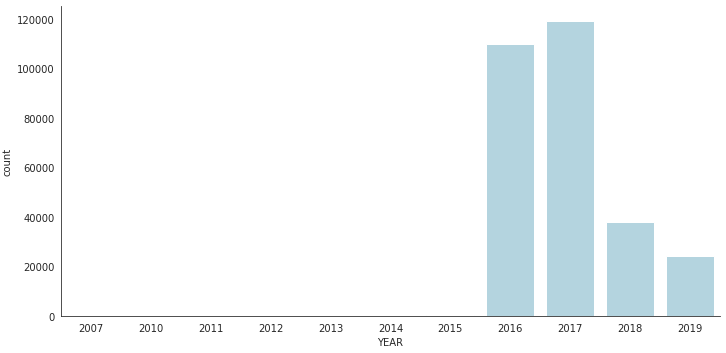

In [11]:
#race documented
with sns.axes_style('white'):
    g = sns.catplot("YEAR", data=df2, aspect=2,
                       kind="count", color='lightblue')
    g.set_xticklabels(step=1)

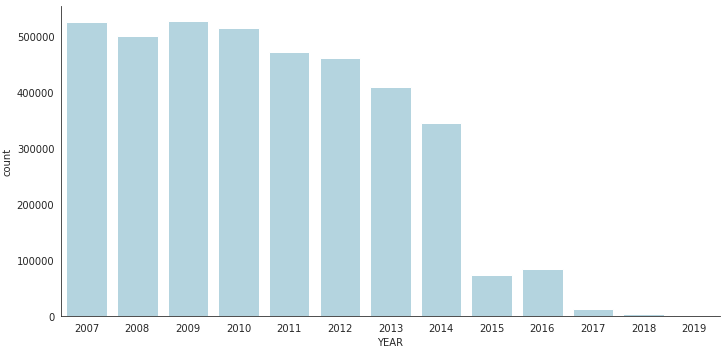

In [12]:
#race not documented ("unknown")
with sns.axes_style('white'):
    g = sns.catplot("YEAR", data=df1, aspect=2,
                       kind="count", color='lightblue')
    g.set_xticklabels(step=1)

In [13]:
# grouping by age to get a cursory look at the distribution
age = df.groupby('AGE_GROUP')
agedf = pd.DataFrame(age.size())
agedf = agedf.rename(columns = {0 : 'SUMMONS_ISSUED'})
agedf

,SUMMONS_ISSUED
AGE_GROUP,
18-24,1083610
25-44,1957651
45-64,899066
65+,58382
<18,181143
UNKNOWN,31292


In [14]:
# individual variable to create chart below
X = agedf[['SUMMONS_ISSUED']]
X.index

Index(['18-24', '25-44', '45-64', '65+', '<18', 'UNKNOWN'], dtype='object', name='AGE_GROUP')

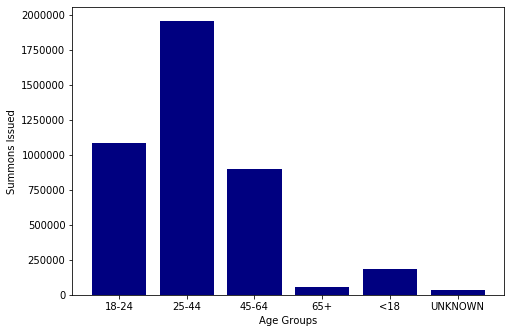

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X.index, X['SUMMONS_ISSUED'], color='navy')
plt.xlabel('Age Groups')
plt.ylabel('Summons Issued')
plt.show()

In [16]:
crace = df.groupby(['YEAR', 'RACE'], as_index=False)
racedf = pd.DataFrame(crace.size())
racedf = racedf.rename(columns = {0 : 'SUMMONS_ISSUED'})
racedf = racedf.reset_index()
racedf

,YEAR,RACE,SUMMONS_ISSUED
0,2007,BLACK,8
1,2007,UNKNOWN,525466
2,2007,WHITE HISPANIC,1
3,2008,UNKNOWN,500342
4,2009,UNKNOWN,526198
...,...,...,...
63,2019,BLACK HISPANIC,2388
64,2019,OTHER,102
65,2019,UNKNOWN,652
66,2019,WHITE,2064


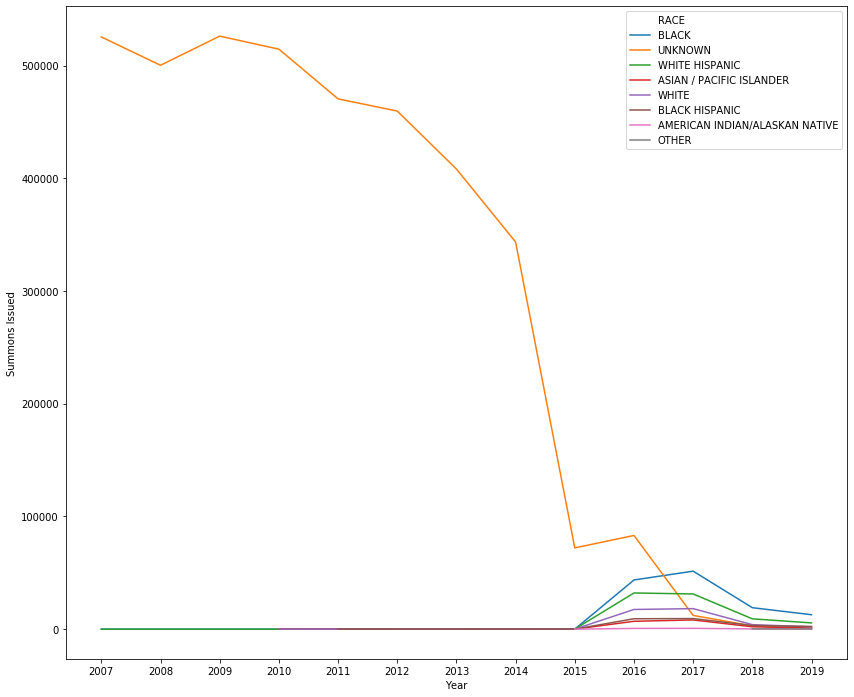

In [17]:
f, ax = plt.subplots(figsize=(14, 12))
g = sns.lineplot(x="YEAR", y="SUMMONS_ISSUED",
             hue="RACE",
             data=racedf)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('Year')
plt.ylabel('Summons Issued')
plt.show()

In [18]:
# test for grouping by summons category type top 10
summonses = df.groupby('SUMMONS_CATEGORY_TYPE')
sData = summonses.size().sort_values(ascending = False)
top10 = pd.DataFrame(sData.iloc[:10])
top10

,0
SUMMONS_CATEGORY_TYPE,
ALCOHOL,1198927
DISORDERLY CONDUCT,684460
PARK REGS,258972
URINATING,248533
BIKE,225451
VTL,208727
TLC,169553
OTHER ADMIN CODE,168243
MARIJUANA,146775


In [19]:
# 0 is patrol, 1 is transit, 2 is housing
df['JURISDICTION_CODE'].unique()

array(['2', '0', '1'], dtype=object)

In [20]:
# jurisdiction check
juris = df.groupby('JURISDICTION_CODE')
jurisdf = juris.size()
jurisdf

JURISDICTION_CODE
0    3704047
1      53759
2     453338
dtype: int64

In [21]:
# division into different datasets
jf1 = df.loc[df['JURISDICTION_CODE'] == '0']
jf2 = df.loc[df['JURISDICTION_CODE'] == '1']
jf3 = df.loc[df['JURISDICTION_CODE'] == '2']

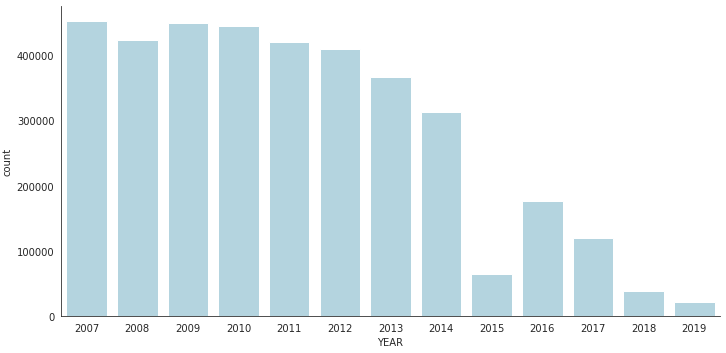

In [22]:
# seaborn datetime bar chart - PATROL
with sns.axes_style('white'):
    g = sns.catplot("YEAR", data=jf1, aspect=2,
                       kind="count", color='lightblue')
    g.set_xticklabels(step=1)

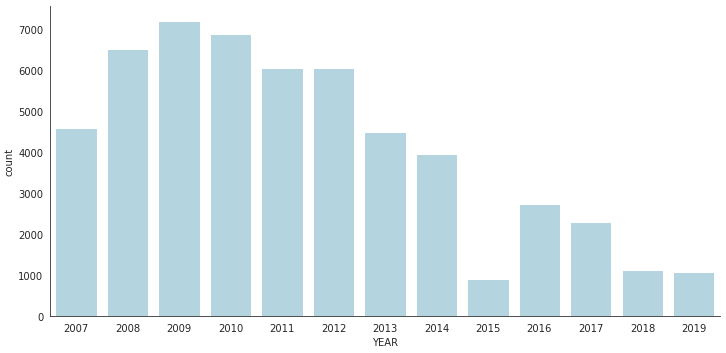

In [23]:
# TRANSIT
with sns.axes_style('white'):
    g = sns.catplot("YEAR", data=jf2, aspect=2,
                       kind="count", color='lightblue')
    g.set_xticklabels(step=1)

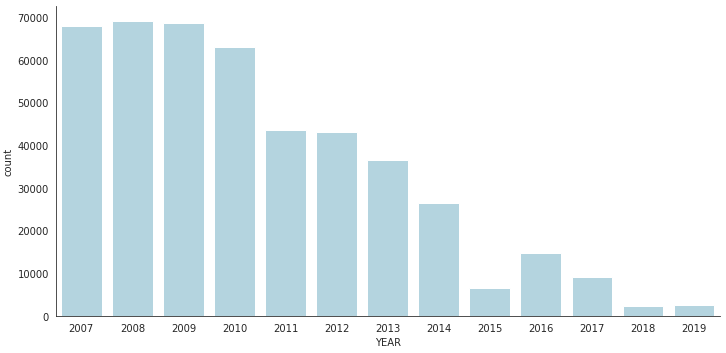

In [24]:
# HOUSING
with sns.axes_style('white'):
    g = sns.catplot("YEAR", data=jf3, aspect=2,
                       kind="count", color='lightblue')
    g.set_xticklabels(step=1)

In [25]:
# 2015 had fewer arrests because of police protests, among other things

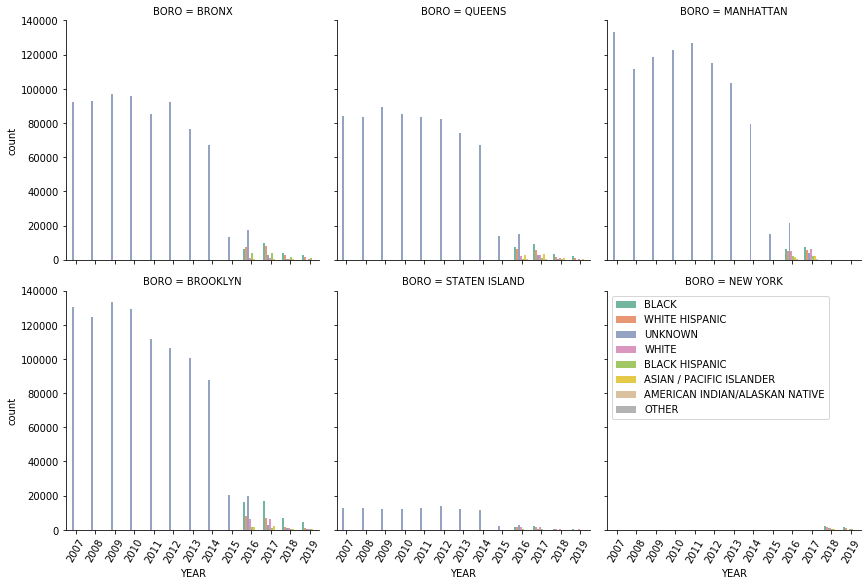

In [26]:
# categorical plots by jurisdiction, borough, and race
# race was mostly logged as "unknown" until 2016, after the policy reforms
g = sns.catplot(x="YEAR", hue="RACE", col="BORO",
                data=jf1, kind="count",
                height=4, col_wrap=3, palette='Set2',legend=False)
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend(loc='upper left')

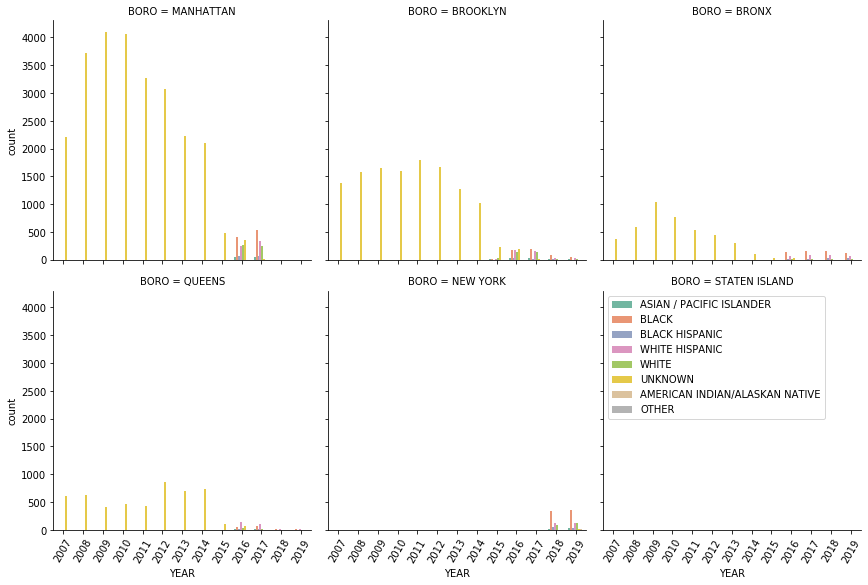

In [27]:
g = sns.catplot(x="YEAR", hue="RACE", col="BORO",
                data=jf2, kind="count",
                height=4, col_wrap=3, palette='Set2',legend=False)
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend(loc='upper left')

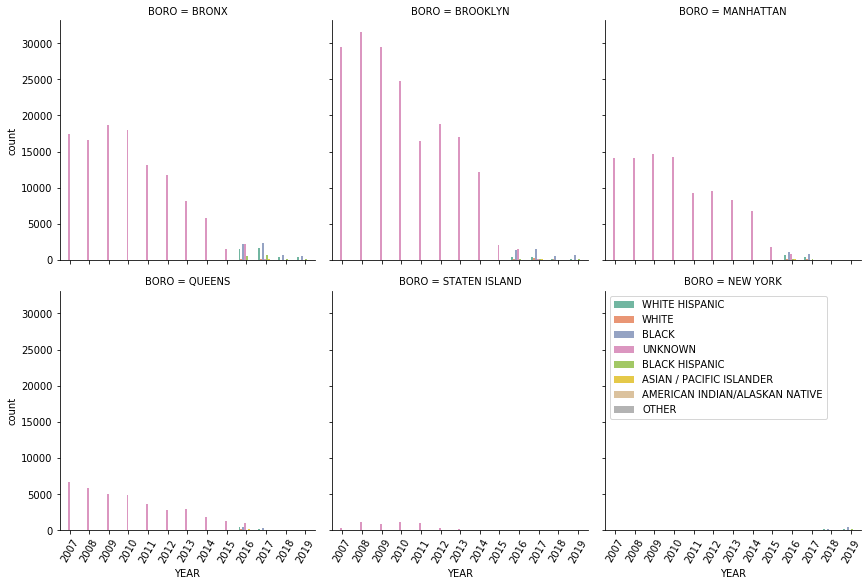

In [28]:
g = sns.catplot(x="YEAR", hue="RACE", col="BORO",
                data=jf3, kind="count",
                height=4, col_wrap=3, palette='Set2',legend=False)
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend(loc='upper left')

In [29]:
# test for a transit focus
transit = jf2.groupby('SUMMONS_CATEGORY_TYPE')
tData = transit.size().sort_values(ascending = False)
ttop10 = pd.DataFrame(tData.iloc[:10])
ttop10

,0
SUMMONS_CATEGORY_TYPE,
ALCOHOL,21880
URINATING,9022
DISORDERLY CONDUCT,8971
TRESPASS,2528
KNIFE,1976
OTHER TRANSIT REG,1898
OTHER ABC,1150
MARIJUANA,1020
LITTERING,613


In [30]:
# indulging a small curiosity
jf2.loc[jf2['SUMMONS_CATEGORY_TYPE'] == 'DOG']

,SUMMONS_KEY,SUMMONS_DATE,OFFENSE_DESCRIPTION,LAW_SECTION_NUMBER,LAW_DESCRIPTION,SUMMONS_CATEGORY_TYPE,AGE_GROUP,SEX,RACE,JURISDICTION_CODE,BORO,PRECINCT_OF_OCCUR,YEAR,MONTH
679482,141617183,2015-03-24,DOG: UNLEASHED,161.05,Health Code,DOG,18-24,F,UNKNOWN,1,MANHATTAN,13,2015,March
772466,139322274,2014-10-22,DOG: UNLEASHED,161.05,Health Code,DOG,25-44,M,UNKNOWN,1,MANHATTAN,13,2014,October
777964,139227382,2014-10-16,DOG: UNLEASHED,161.05,Health Code,DOG,45-64,M,UNKNOWN,1,MANHATTAN,18,2014,October
1123853,93642111,2013-11-18,DOG: UNLEASHED,161.05,Health Code,DOG,65+,M,UNKNOWN,1,MANHATTAN,13,2013,November
1218939,92470640,2013-08-20,DOG: UNLEASHED,161.05,Health Code,DOG,25-44,M,UNKNOWN,1,BRONX,46,2013,August
1908639,83557676,2012-03-07,DOG: UNLEASHED,161.05,Health Code,DOG,25-44,M,UNKNOWN,1,MANHATTAN,13,2012,March
2477994,76732976,2011-01-06,DOG: UNLEASHED,161.05,Health Code,DOG,25-44,F,UNKNOWN,1,BROOKLYN,76,2011,January
2841608,72682658,2010-05-04,DOG: UNLICENSED,161.04,Health Code,DOG,25-44,F,UNKNOWN,1,MANHATTAN,30,2010,May
3094926,67211602,2009-10-26,DOG: UNLEASHED,161.05,Health Code,DOG,18-24,M,UNKNOWN,1,BRONX,40,2009,October
3229558,64798404,2009-08-02,DOG: UNLEASHED,161.05,Health Code,DOG,25-44,M,UNKNOWN,1,MANHATTAN,32,2009,August


In [31]:
grouped = df.groupby(['YEAR', 'MONTH'], as_index=False)
test = pd.DataFrame(grouped.size())
test = test.rename(columns = {0 : 'SUMMONS_ISSUED'})
test = test.reset_index()
test

,YEAR,MONTH,SUMMONS_ISSUED
0,2007,April,46081
1,2007,August,46460
2,2007,December,30801
3,2007,February,38088
4,2007,January,40076
...,...,...,...
148,2019,July,3307
149,2019,June,2815
150,2019,March,2799
151,2019,May,2792


In [32]:
test = test.pivot("MONTH", "YEAR", "SUMMONS_ISSUED")
test = test.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
test

YEAR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
MONTH,,,,,,,,,,,,,
January,40076.0,41124.0,38585.0,38101.0,30884.0,34577.0,28501.0,23351.0,12549.0,143.0,14236.0,5892.0,2818.0
February,38088.0,40575.0,42277.0,34377.0,35726.0,35989.0,29232.0,23379.0,17642.0,504.0,13744.0,4387.0,2394.0
March,46021.0,42103.0,47482.0,42091.0,40827.0,44963.0,35341.0,29902.0,22040.0,20411.0,14618.0,4164.0,2799.0
April,46081.0,43296.0,48149.0,47420.0,44260.0,40480.0,39019.0,30357.0,17792.0,18683.0,18991.0,3503.0,2553.0
May,53727.0,47336.0,50244.0,53234.0,47900.0,43488.0,43535.0,36409.0,1223.0,21481.0,18228.0,3296.0,2792.0
June,52776.0,43967.0,44479.0,49560.0,48764.0,40810.0,42285.0,36907.0,194.0,23126.0,12865.0,2933.0,2815.0
July,47095.0,43344.0,50214.0,52194.0,48018.0,43677.0,40605.0,36565.0,279.0,21716.0,8339.0,3575.0,3307.0
August,46460.0,45646.0,52110.0,48658.0,36826.0,45567.0,38989.0,36394.0,185.0,21742.0,7270.0,3223.0,2794.0
September,44774.0,41878.0,45773.0,44366.0,36666.0,41457.0,31681.0,30452.0,196.0,19335.0,5806.0,2717.0,2437.0


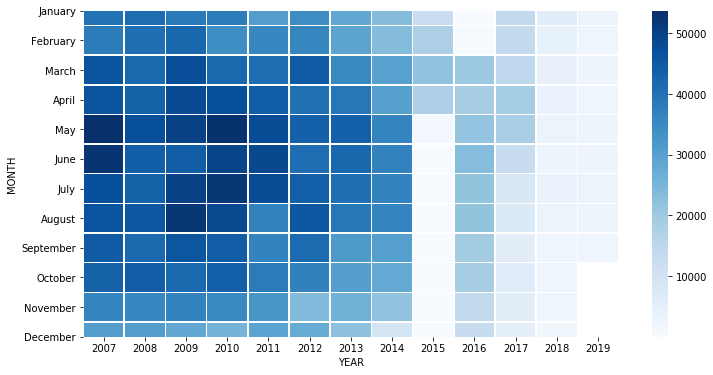

In [33]:
# sorry about the boxes getting cut off--apparently this is a known issue 
# (see seaborn GH issues #1773 and #1838)
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(test, linewidths=.5, cmap="Blues")

In [34]:
# focusing in on 2016-present (post-reform)

pDf = df.loc[df['YEAR'] > 2015]
pDf

,SUMMONS_KEY,SUMMONS_DATE,OFFENSE_DESCRIPTION,LAW_SECTION_NUMBER,LAW_DESCRIPTION,SUMMONS_CATEGORY_TYPE,AGE_GROUP,SEX,RACE,JURISDICTION_CODE,BORO,PRECINCT_OF_OCCUR,YEAR,MONTH
0,173135642,2017-12-31,"RIFLE, SHOTGUN, AMMO SALE OR PURCHASE",10-306,Administrative Code,AMMO,25-44,F,WHITE HISPANIC,2,BRONX,43,2017,December
1,173138632,2017-12-31,"MARIJUANA, POSSESSION OF",221.05,Penal Law,MARIJUANA,25-44,F,BLACK,0,BRONX,44,2017,December
2,173193579,2017-12-31,KEY IN IGNITION,10-111,Administrative Code,KEY,25-44,M,WHITE HISPANIC,0,QUEENS,113,2017,December
3,173135647,2017-12-31,DISORDERLY CONDUCT,240.20,Penal Law,DISORDERLY CONDUCT,18-24,M,WHITE HISPANIC,0,QUEENS,114,2017,December
4,173135644,2017-12-31,CONSUMPTION OF ALCOHOL,10-125,Administrative Code,ALCOHOL,25-44,M,WHITE HISPANIC,2,BRONX,40,2017,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262297,191735043,2019-01-01,RECKLESS DRIVING,1212,VTL,VTL,25-44,M,BLACK,0,BRONX,44,2019,January
5262299,191735520,2019-01-01,"MARIJUANA, POSSESSION OF",221.05,Penal Law,MARIJUANA,18-24,M,WHITE HISPANIC,0,QUEENS,112,2019,January
5262300,191746059,2019-01-01,DISORDERLY PREMISE,106-6,ABC,ABC,25-44,M,WHITE HISPANIC,0,NEW YORK,34,2019,January
5262302,191821367,2019-01-01,DISCON: REFUSE LAWFUL ORDER,240.20-6,Penal Law,DISORDERLY CONDUCT,25-44,M,WHITE HISPANIC,0,BRONX,43,2019,January


In [35]:
gpdf = pDf.groupby(['YEAR', 'MONTH'], as_index=False)
gpdf = pd.DataFrame(gpdf.size()).rename(columns = {0 : 'SUMMONS_ISSUED'}).reset_index()
gpdf = gpdf.pivot("MONTH", "YEAR", "SUMMONS_ISSUED")
gpdf = gpdf.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
gpdf

YEAR,2016,2017,2018,2019
MONTH,,,,
January,143.0,14236.0,5892.0,2818.0
February,504.0,13744.0,4387.0,2394.0
March,20411.0,14618.0,4164.0,2799.0
April,18683.0,18991.0,3503.0,2553.0
May,21481.0,18228.0,3296.0,2792.0
June,23126.0,12865.0,2933.0,2815.0
July,21716.0,8339.0,3575.0,3307.0
August,21742.0,7270.0,3223.0,2794.0
September,19335.0,5806.0,2717.0,2437.0


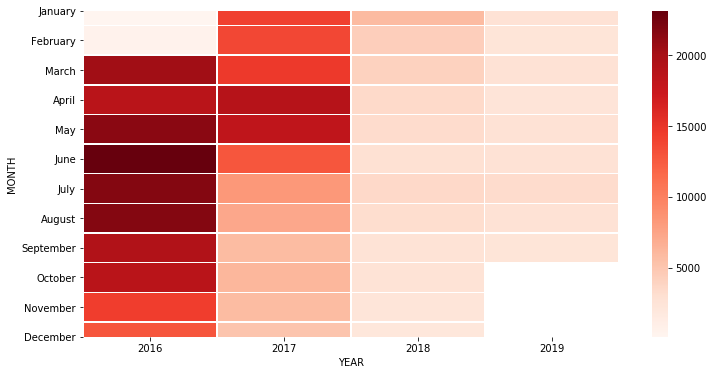

In [36]:
# focused heatmap on post-policy, to get a visual sense of just how much the decrease is
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(gpdf, linewidths=.5, cmap="Reds")

In [37]:
# demographic breakdown by race and year
cr = pDf.groupby(['YEAR', 'RACE'], as_index=False)
rdf = pd.DataFrame(cr.size())
rdf = rdf.rename(columns = {0 : 'SUMMONS_ISSUED'})
rdf = rdf.reset_index()
rdf

,YEAR,RACE,SUMMONS_ISSUED
0,2016,AMERICAN INDIAN/ALASKAN NATIVE,642
1,2016,ASIAN / PACIFIC ISLANDER,6973
2,2016,BLACK,43627
3,2016,BLACK HISPANIC,9230
4,2016,UNKNOWN,83118
5,2016,WHITE,17460
6,2016,WHITE HISPANIC,32106
7,2017,AMERICAN INDIAN/ALASKAN NATIVE,713
8,2017,ASIAN / PACIFIC ISLANDER,8177
9,2017,BLACK,51455


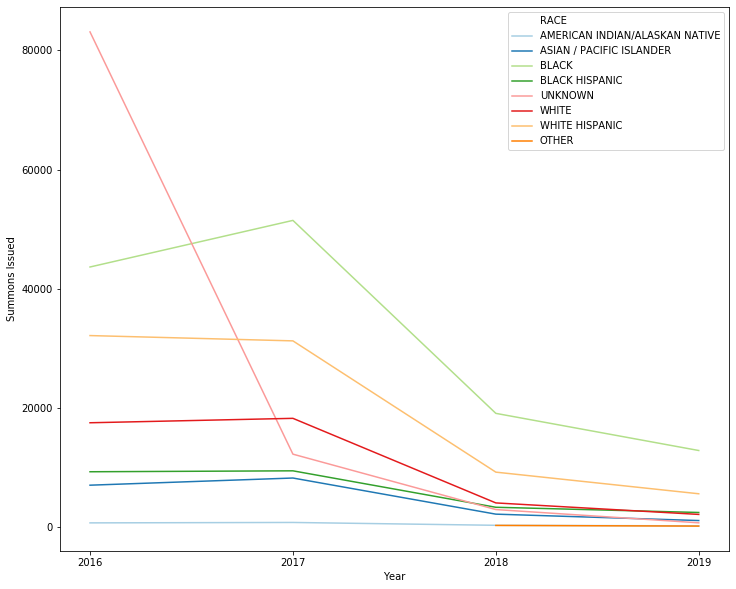

In [38]:
# visualization of the table

f, ax = plt.subplots(figsize=(12, 10))
sns.lineplot(x="YEAR", y="SUMMONS_ISSUED",
             hue="RACE", palette='Paired',
             data=rdf)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('Year')
plt.ylabel('Summons Issued')
plt.show()

In [39]:
sm = pDf.groupby('SUMMONS_CATEGORY_TYPE')
smdf = sm.size().sort_values(ascending = False)
top10update = pd.DataFrame(smdf.iloc[:10]).rename(columns = {0 : 'SUMMONS_ISSUED'}).reset_index()
top10update

,SUMMONS_CATEGORY_TYPE,SUMMONS_ISSUED
0,ALCOHOL,110023
1,MARIJUANA,61331
2,DISORDERLY CONDUCT,31587
3,VTL,30043
4,PARK REGS,22854
5,URINATING,21754
6,TLC,20537
7,OTHER ADMIN CODE,13996
8,TRESPASS,13245
9,NOISE,6354


In [40]:
sf1 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'ALCOHOL']
sf2 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'DISORDERLY CONDUCT']
sf3 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'PARK REGS']
sf4 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'URINATING']
sf5 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'BIKE']
sf6 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'VTL']
sf7 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'TLC']
sf8 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'TRESPASSS']
sf9 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'MARIJUANA']
sf10 = pDf.loc[pDf['SUMMONS_CATEGORY_TYPE'] == 'VENDING']
updf = pd.concat([sf1, sf2, sf3, sf4, sf5, sf6, sf7, sf8, sf9, sf10])

In [41]:
updf1 = updf.groupby(['YEAR', 'SUMMONS_CATEGORY_TYPE', 'AGE_GROUP', 'RACE'])
updf1 = updf1.size()
updf1 = pd.DataFrame(updf1).rename(columns = {0 : 'SUMMONS_ISSUED'}).reset_index()
updf1

,YEAR,SUMMONS_CATEGORY_TYPE,AGE_GROUP,RACE,SUMMONS_ISSUED
0,2016,ALCOHOL,18-24,AMERICAN INDIAN/ALASKAN NATIVE,31
1,2016,ALCOHOL,18-24,ASIAN / PACIFIC ISLANDER,492
2,2016,ALCOHOL,18-24,BLACK,1994
3,2016,ALCOHOL,18-24,BLACK HISPANIC,735
4,2016,ALCOHOL,18-24,UNKNOWN,5872
...,...,...,...,...,...
1141,2019,VTL,<18,WHITE,3
1142,2019,VTL,<18,WHITE HISPANIC,4
1143,2019,VTL,UNKNOWN,BLACK HISPANIC,1
1144,2019,VTL,UNKNOWN,UNKNOWN,1


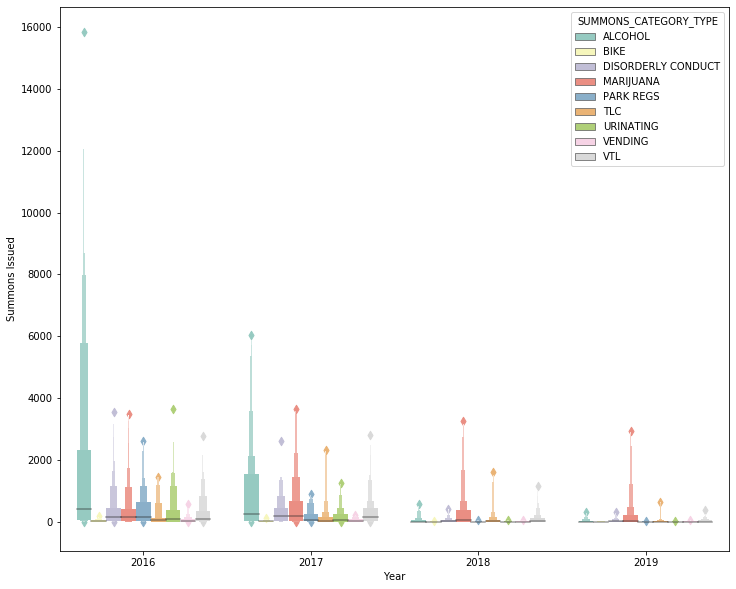

In [42]:
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.boxenplot(x="YEAR", y="SUMMONS_ISSUED", hue="SUMMONS_CATEGORY_TYPE",
                   data=updf1, palette="Set3")
plt.xlabel('Year')
plt.ylabel('Summons Issued')
plt.show()

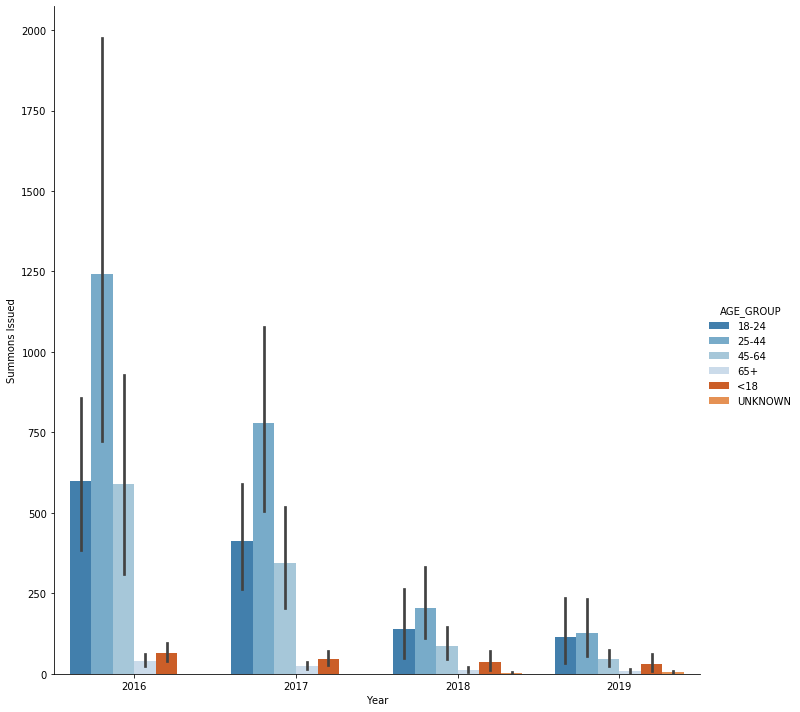

In [43]:
g = sns.catplot(x="YEAR", y="SUMMONS_ISSUED", hue="AGE_GROUP", data=updf1,
                height=10, kind="bar", palette="tab20c")
plt.xlabel('Year')
plt.ylabel('Summons Issued')
plt.show()

In [44]:
# ALCOHOL DEMOGRAPHICS
sfdf = sf1.groupby(['YEAR', 'AGE_GROUP', 'RACE'])
sfdf = sfdf.size()
sfdf = pd.DataFrame(sfdf).rename(columns = {0 : 'SUMMONS_ISSUED'}).reset_index()
sfdf

,YEAR,AGE_GROUP,RACE,SUMMONS_ISSUED
0,2016,18-24,AMERICAN INDIAN/ALASKAN NATIVE,31
1,2016,18-24,ASIAN / PACIFIC ISLANDER,492
2,2016,18-24,BLACK,1994
3,2016,18-24,BLACK HISPANIC,735
4,2016,18-24,UNKNOWN,5872
...,...,...,...,...
125,2019,65+,WHITE HISPANIC,5
126,2019,<18,BLACK,6
127,2019,<18,WHITE,1
128,2019,UNKNOWN,BLACK,4


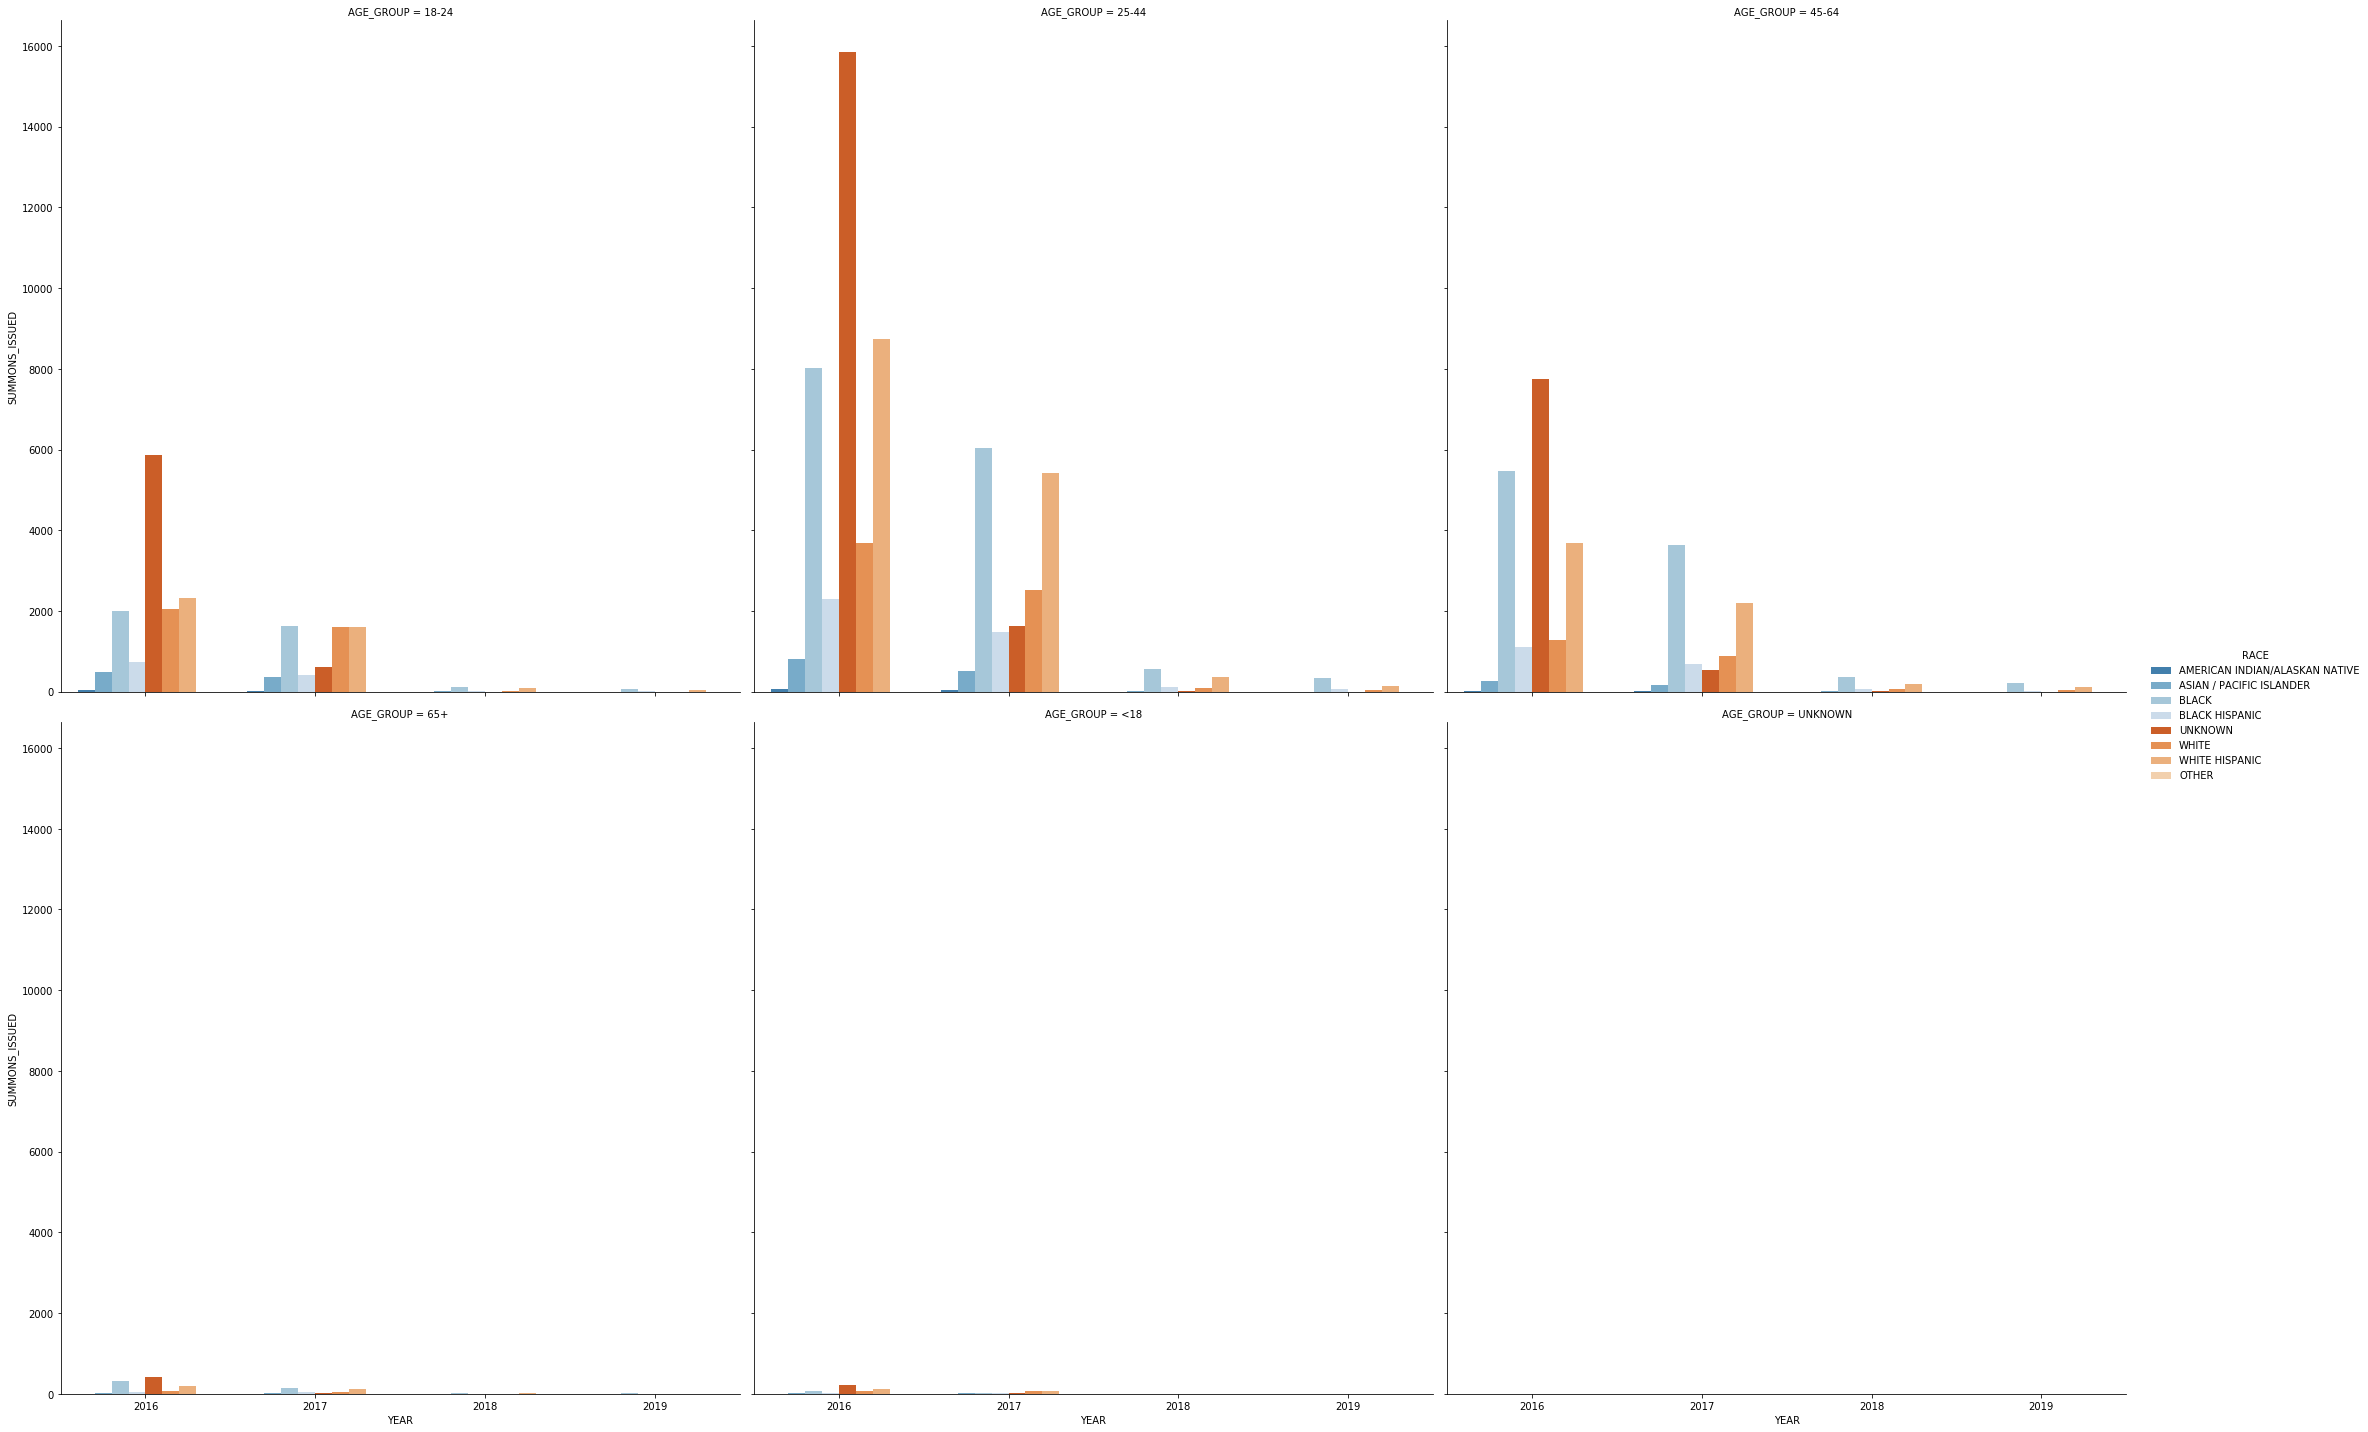

In [45]:
g = sns.catplot(x="YEAR", y="SUMMONS_ISSUED", hue="RACE", col="AGE_GROUP", data=sfdf,
                height=10, col_wrap=3, kind="bar", palette="tab20c")

In [46]:
# MARIJUANA DEMOGRAPHICS

sfdf2 = sf9.groupby(['YEAR', 'AGE_GROUP', 'RACE'])
sfdf2 = sfdf2.size()
sfdf2 = pd.DataFrame(sfdf2).rename(columns = {0 : 'SUMMONS_ISSUED'}).reset_index()
sfdf2

,YEAR,AGE_GROUP,RACE,SUMMONS_ISSUED
0,2016,18-24,AMERICAN INDIAN/ALASKAN NATIVE,18
1,2016,18-24,ASIAN / PACIFIC ISLANDER,346
2,2016,18-24,BLACK,1693
3,2016,18-24,BLACK HISPANIC,330
4,2016,18-24,UNKNOWN,3494
...,...,...,...,...
140,2019,<18,WHITE HISPANIC,192
141,2019,UNKNOWN,BLACK,28
142,2019,UNKNOWN,BLACK HISPANIC,7
143,2019,UNKNOWN,WHITE,3


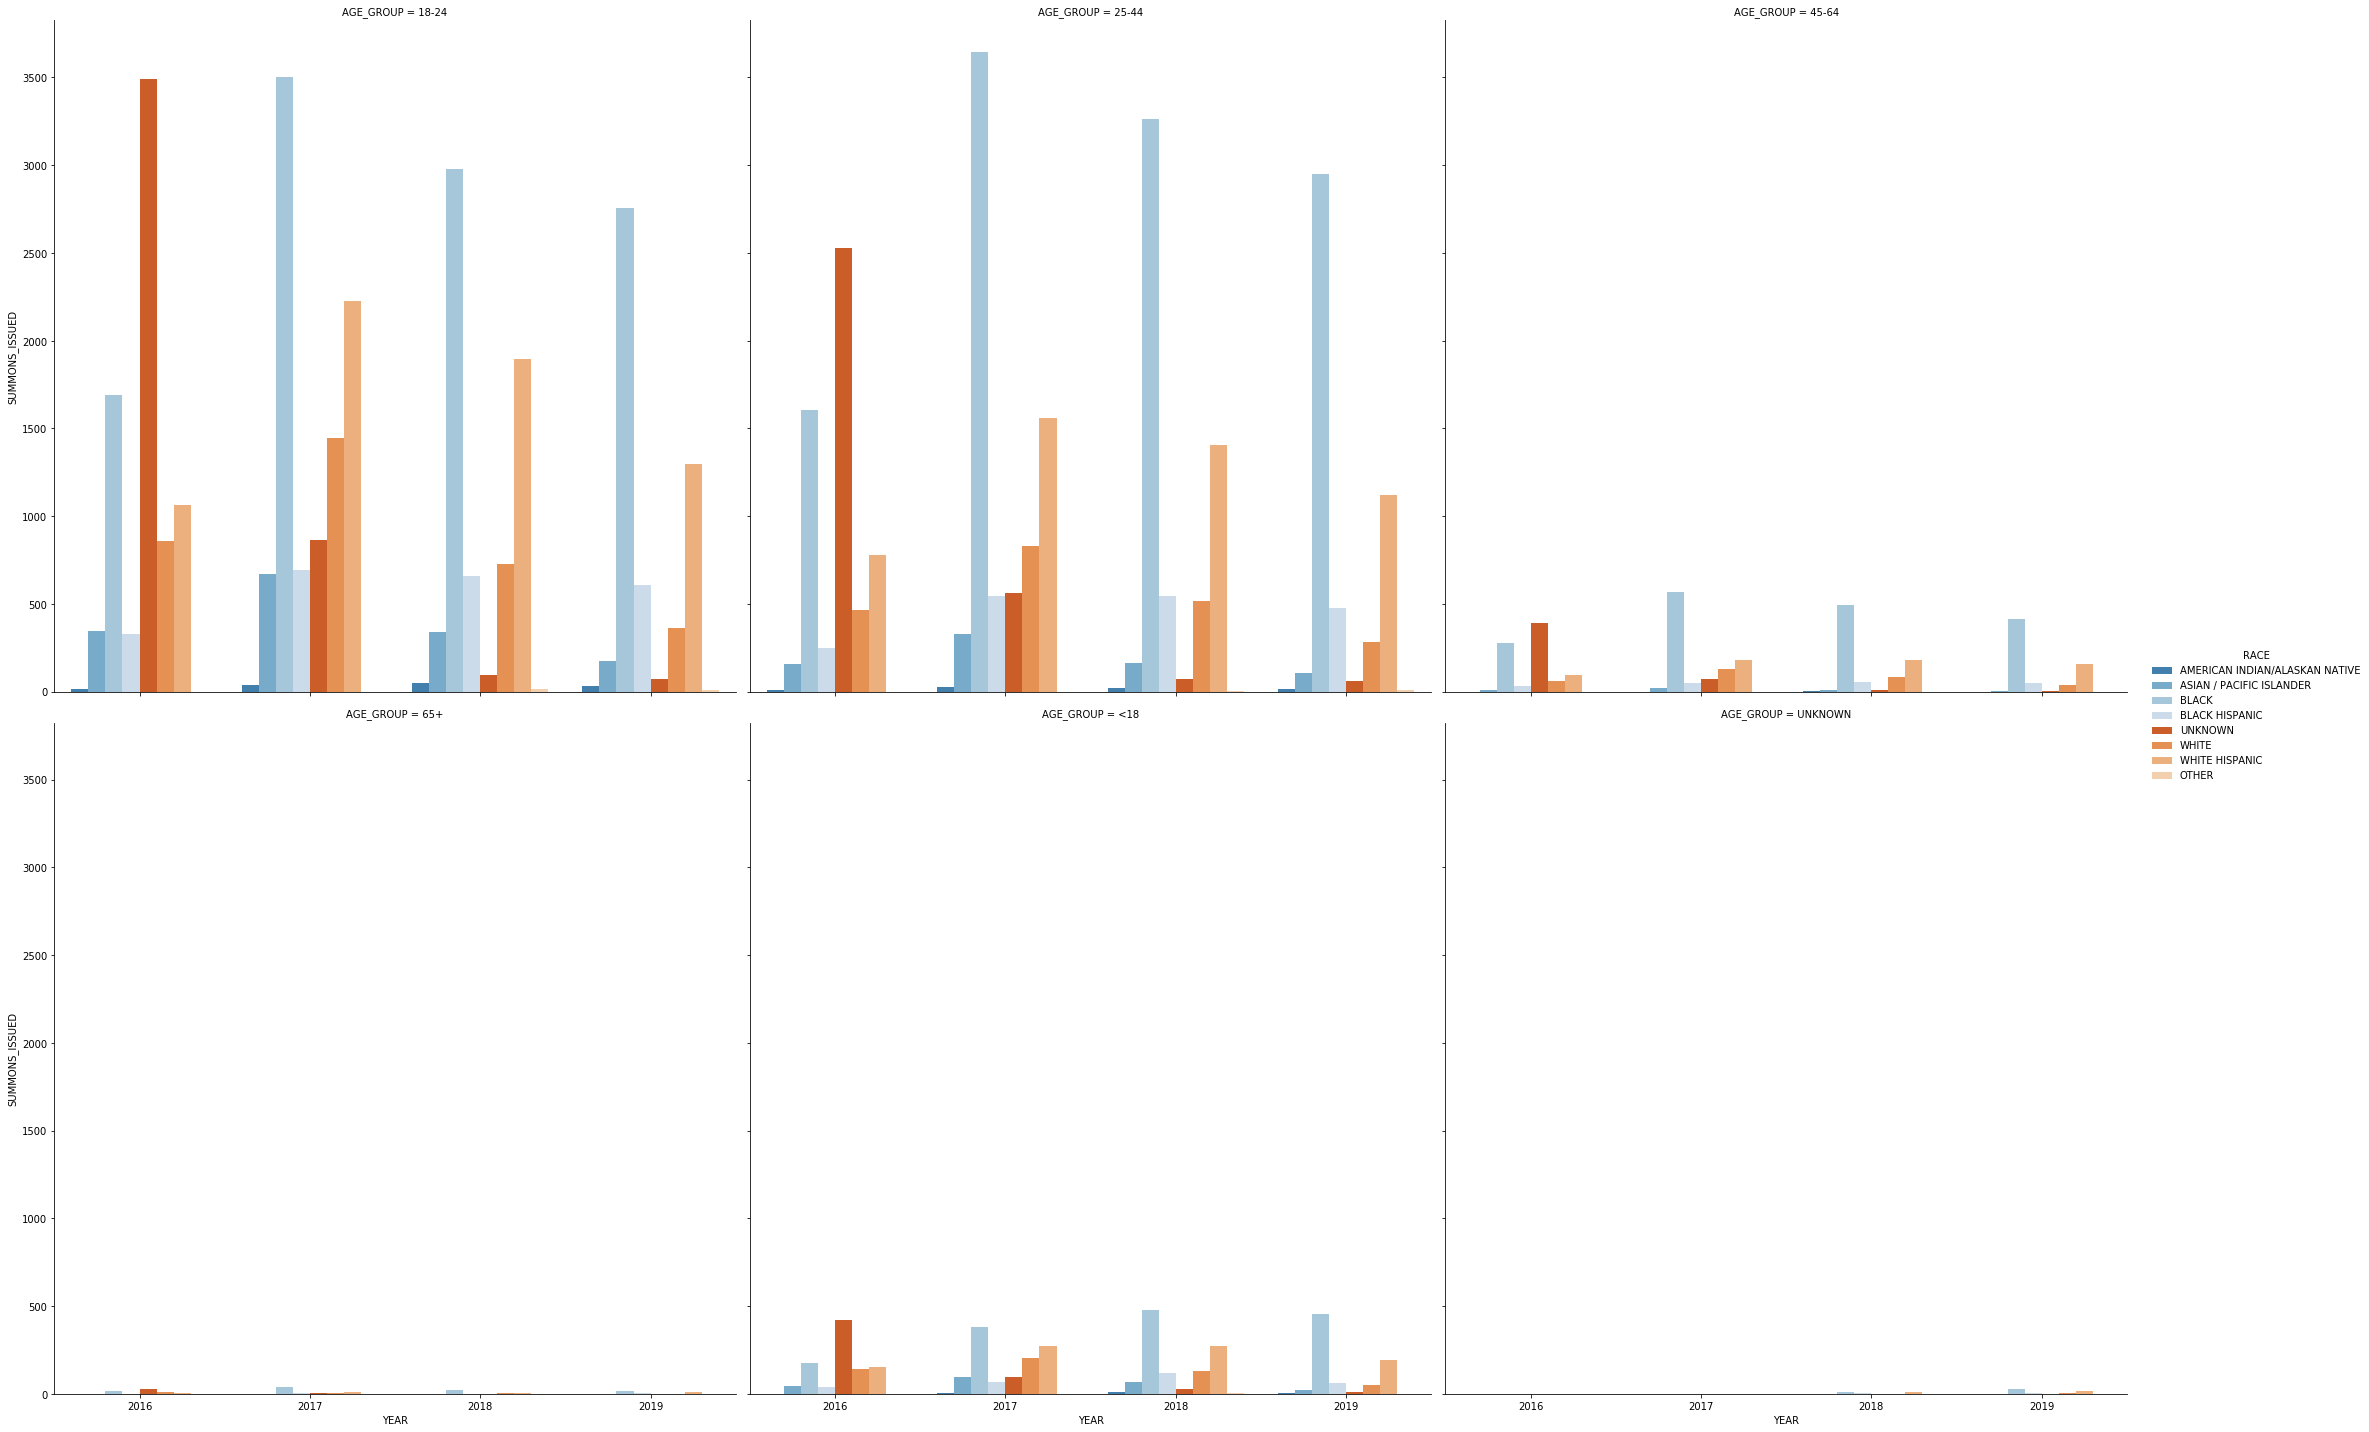

In [47]:
g = sns.catplot(x="YEAR", y="SUMMONS_ISSUED", hue="RACE", col="AGE_GROUP", data=sfdf2,
                height=10, col_wrap=3, kind="bar", palette="tab20c")

In [48]:
# DISORDERLY CONDUCT

sfdf3 = sf2.groupby(['YEAR', 'AGE_GROUP', 'RACE'])
sfdf3 = sfdf3.size()
sfdf3 = pd.DataFrame(sfdf3).rename(columns = {0 : 'SUMMONS_ISSUED'}).reset_index()
sfdf3

,YEAR,AGE_GROUP,RACE,SUMMONS_ISSUED
0,2016,18-24,AMERICAN INDIAN/ALASKAN NATIVE,12
1,2016,18-24,ASIAN / PACIFIC ISLANDER,115
2,2016,18-24,BLACK,894
3,2016,18-24,BLACK HISPANIC,282
4,2016,18-24,UNKNOWN,1963
...,...,...,...,...
137,2019,<18,WHITE HISPANIC,27
138,2019,UNKNOWN,BLACK,3
139,2019,UNKNOWN,BLACK HISPANIC,1
140,2019,UNKNOWN,OTHER,1


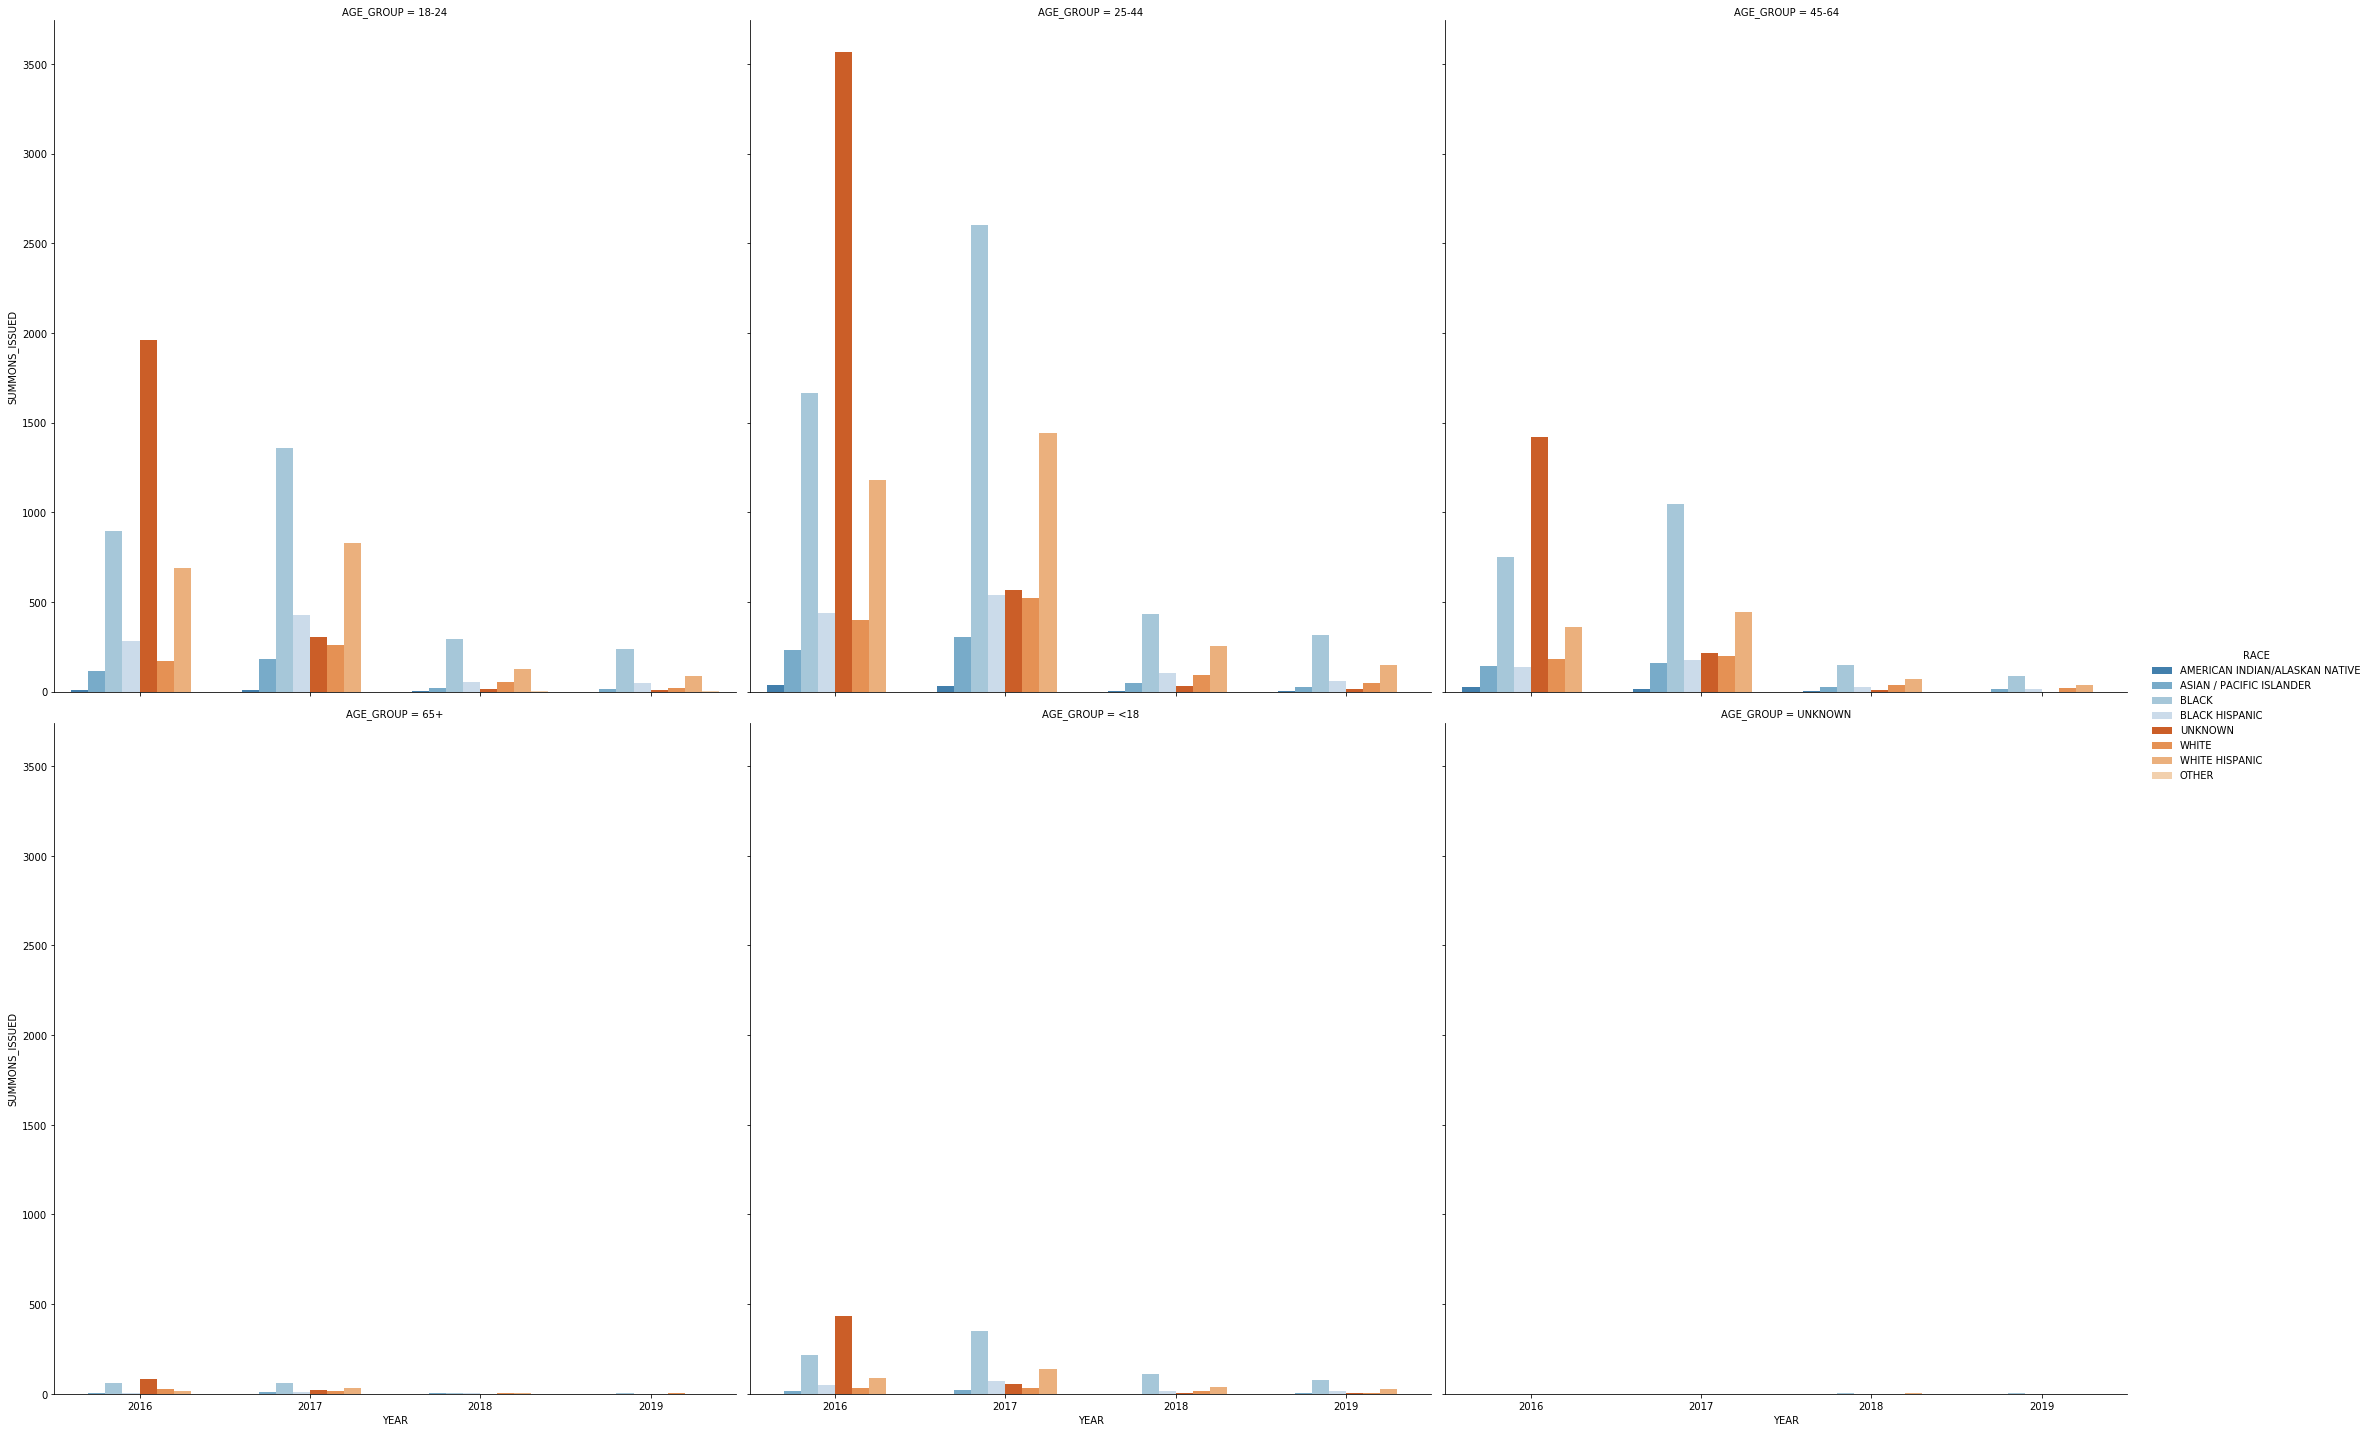

In [49]:
g = sns.catplot(x="YEAR", y="SUMMONS_ISSUED", hue="RACE", col="AGE_GROUP", data=sfdf3,
                height=10, col_wrap=3, kind="bar", palette="tab20c")

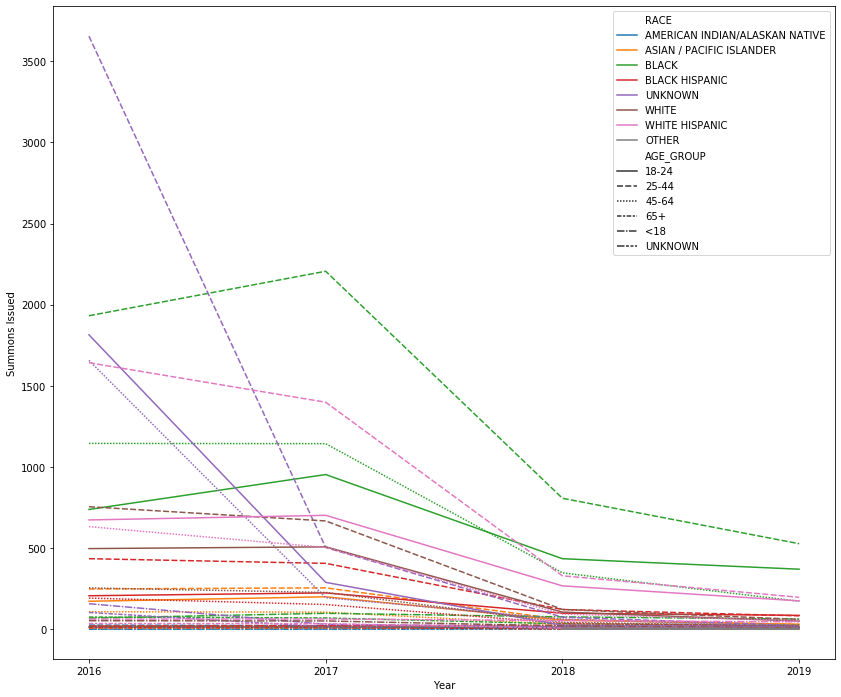

In [50]:
# this chart isn't ideal, but does show the dimensions I need
f, ax = plt.subplots(figsize=(14, 12))
g = sns.lineplot(x="YEAR", y="SUMMONS_ISSUED",
             hue="RACE", style="AGE_GROUP",
             data=updf1, ci=None, palette='tab10')
style = dict(size=10, color='gray')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('Year')
plt.ylabel('Summons Issued')
plt.show()

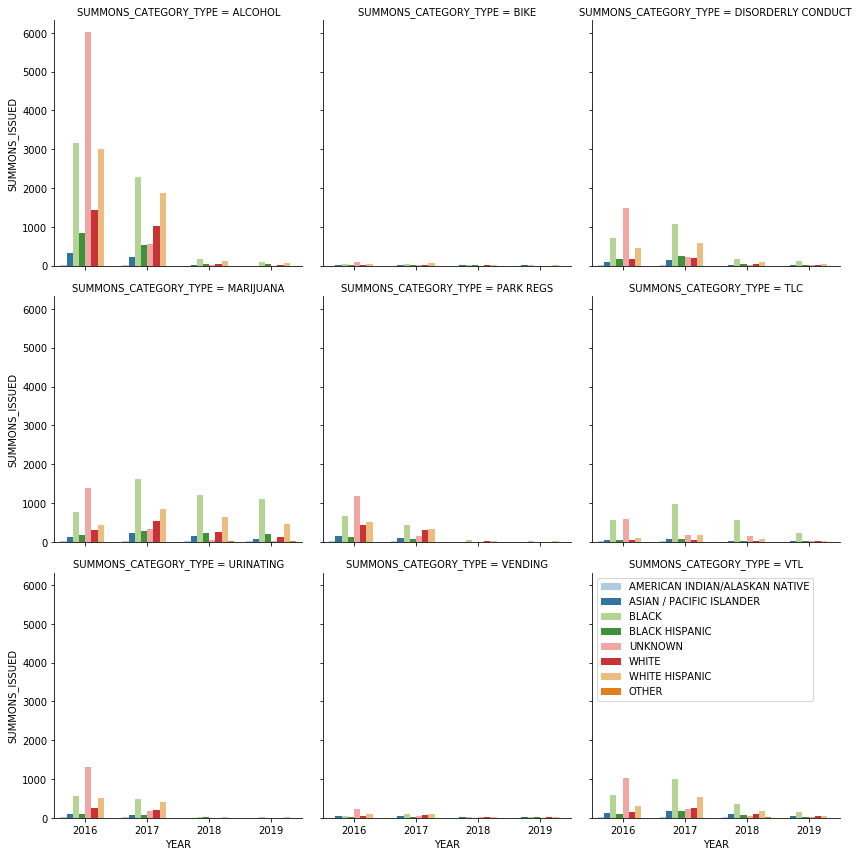

In [51]:
g = sns.catplot(x="YEAR", y="SUMMONS_ISSUED", col="SUMMONS_CATEGORY_TYPE",
                data=updf1, hue="RACE", palette='Paired', col_wrap=3,
                kind="bar", ci=None, height=4, legend=False)
plt.legend(loc='upper left')

In [52]:
#jurisdiction with 2016-2019 data only
jf4 = pDf.loc[df['JURISDICTION_CODE'] == '0']
jf5 = pDf.loc[df['JURISDICTION_CODE'] == '1']
jf6 = pDf.loc[df['JURISDICTION_CODE'] == '2']

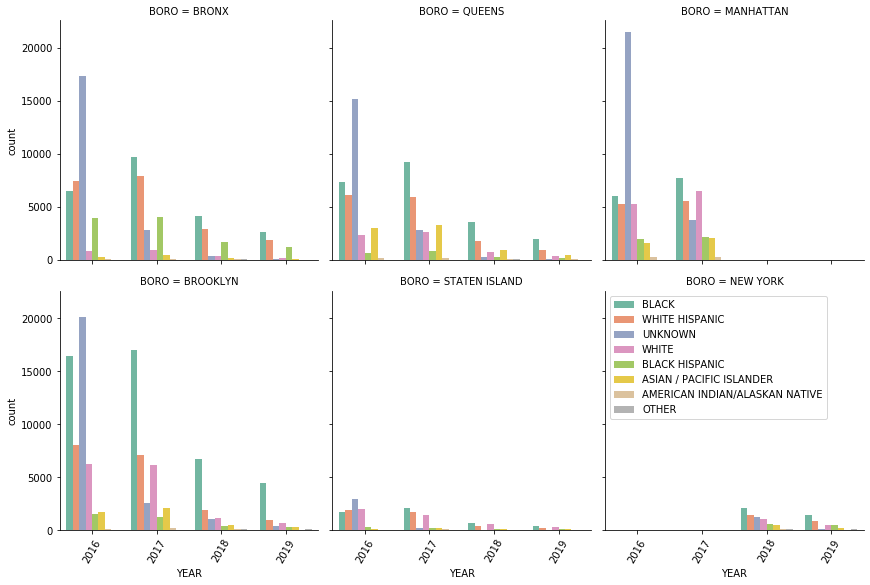

In [53]:
g = sns.catplot(x="YEAR", hue="RACE", col="BORO",
                data=jf4, kind="count",
                height=4, col_wrap=3, palette='Set2',legend=False)
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend(loc='upper left')

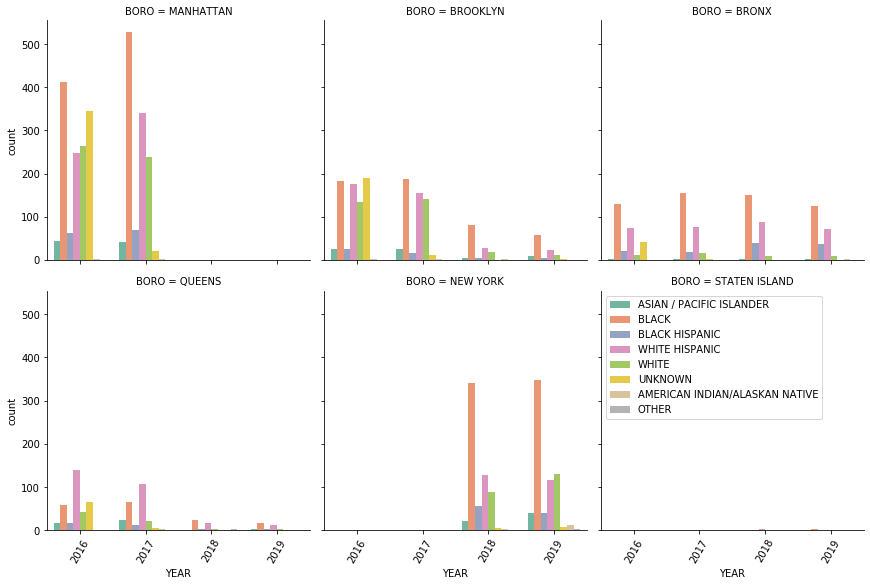

In [54]:
g = sns.catplot(x="YEAR", hue="RACE", col="BORO",
                data=jf5, kind="count",
                height=4, col_wrap=3, palette='Set2',legend=False)
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend(loc='upper left')

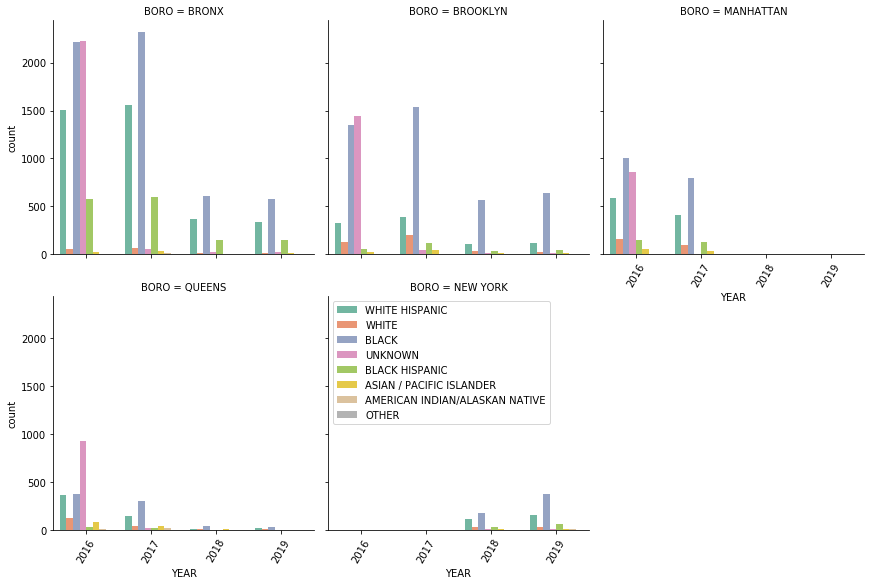

In [55]:
g = sns.catplot(x="YEAR", hue="RACE", col="BORO",
                data=jf6, kind="count",
                height=4, col_wrap=3, palette='Set2',legend=False)
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend(loc='upper left')

In [56]:
# statistics by summons category prior to the reform laws being implemented
pdf2 = df.loc[df['YEAR'] <= 2015]
sm1 = pdf2.groupby('SUMMONS_CATEGORY_TYPE')
smdf1 = sm1.size().sort_values(ascending = False)
smdf1 = pd.DataFrame(smdf1)
smdf1 = smdf1.rename(columns = {0 : 'SUMMONS_ISSUED 2006-2015'})
smdf1

,SUMMONS_ISSUED 2006-2015
SUMMONS_CATEGORY_TYPE,
ALCOHOL,1088904
DISORDERLY CONDUCT,652873
PARK REGS,236118
URINATING,226779
BIKE,223055
...,...
OTHER VTL,40
OTHER EDUCATION LAW,38
OTHER ACA,37


In [57]:
# these are the individual summons category (top 10) dataframes - reference

# sf1 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'ALCOHOL']
# sf2 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'DISORDERLY CONDUCT']
# sf3 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'PARK REGS']
# sf4 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'URINATING']
# sf5 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'BIKE']
# sf6 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'VTL']
# sf7 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'TLC']
# sf8 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'OTHER ADMIN CODE']
# sf9 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'MARIJUANA']
# sf10 = df.loc[df['SUMMONS_CATEGORY_TYPE'] == 'VENDING']